In [1]:
# Importing general use libraries (matplotlib and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

import io
dataframe1 = pd.read_csv(io.BytesIO(uploaded['train_values.csv']))
dataframe2 = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))

# Click in Choose Files and select data file

Saving train_labels.csv to train_labels.csv
Saving train_values.csv to train_values.csv


In [3]:
df1 = dataframe1
df2 = dataframe2

In [9]:
df1

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df1.has_secondary_use_agriculture.value_counts()

0    243824
1     16777
Name: has_secondary_use_agriculture, dtype: int64

In [12]:
df1.shape


(260601, 39)

In [14]:
df2.shape

(260601, 2)

In [19]:
df = df1
df['damage_grade'] = df2['damage_grade']
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [64]:
d = {1:"low", 2:"medium", 3:"high"}
df.damage_grade = df.damage_grade.apply(lambda x: d[x])

In [21]:
df.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

# **Analisis por geo level**

In [30]:
len(df.geo_level_1_id.unique())

31

### Vamos a trabajar con los que tengan mas de 1000 muestreos en este caso

In [31]:
df.geo_level_1_id.value_counts()


6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: geo_level_1_id, dtype: int64

In [51]:
# I get the zones with more than 1000 samples
geo_1 = df[['building_id','geo_level_1_id', 'damage_grade']]
geo_1 = geo_1.groupby('geo_level_1_id').filter(lambda x: len(x) > 1000)
geo_1 = geo_1.groupby(['geo_level_1_id', 'damage_grade']).count()
geo_1 = geo_1.reset_index().rename(columns={'building_id':'count'})
geo_1

,geo_level_1_id,damage_grade,count
0,0,1,337
1,0,2,3075
2,0,3,599
3,1,1,411
4,1,2,1985
...,...,...,...
76,27,2,6007
77,27,3,6060
78,30,1,252
79,30,2,2127


## Podría analizarse a partir de este gráfico características de la región 17 por tener tantos casos de high damage grade.

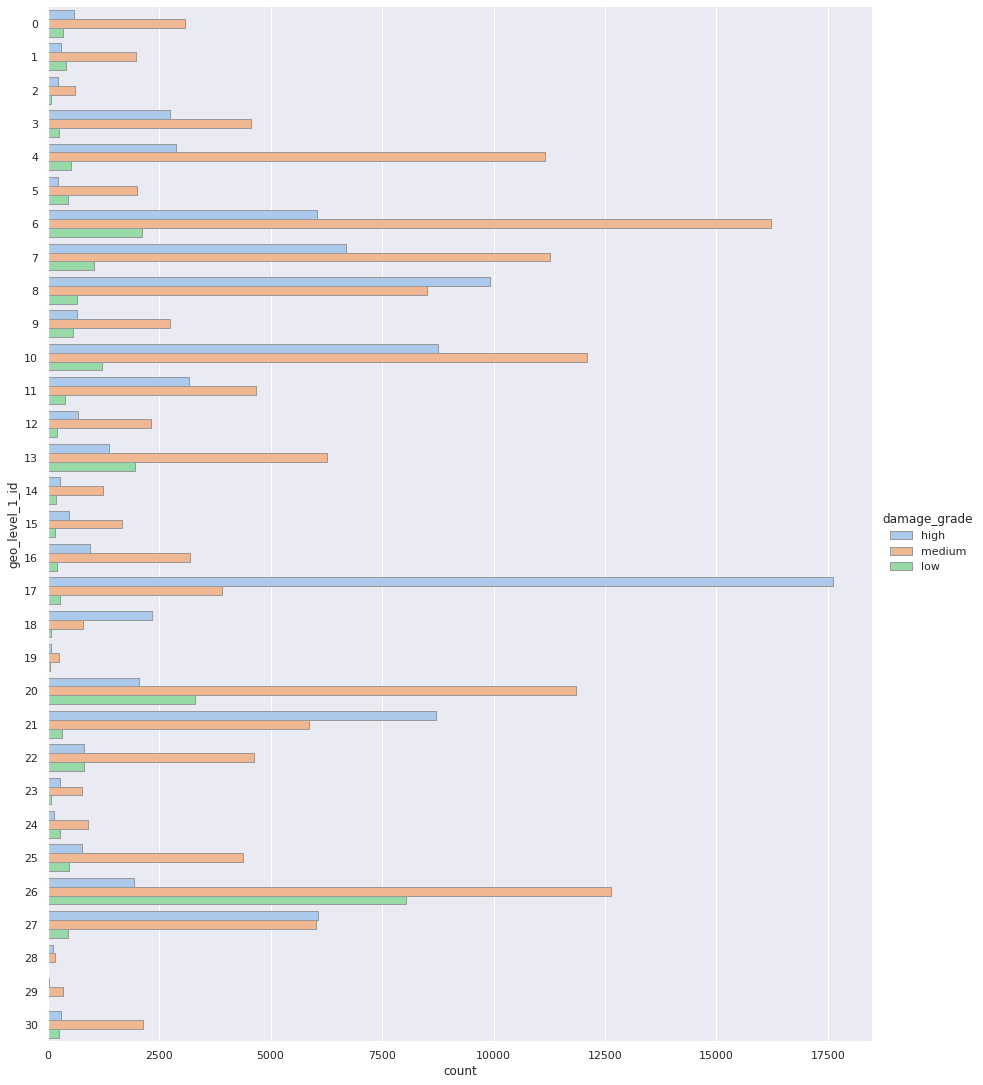

In [65]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(y="geo_level_1_id", hue="damage_grade", kind="count",
            palette="pastel", edgecolor=".6",
            data=df, height=15, aspect=6.7/8.27)

### Repetimos el proceso de filtrado para trabajar con geo level 2 y 3, pero los graficos resultantes no entregaron algo de información que resulte notoria.

In [32]:
len(df.geo_level_2_id.unique())


1414

In [37]:
df.geo_level_2_id.value_counts().head(20)


39      4038
158     2520
181     2080
1387    2040
157     1897
363     1760
463     1740
673     1704
533     1684
883     1626
1394    1537
548     1497
1006    1450
720     1359
991     1145
1001    1135
889     1114
765     1091
1253    1090
1155    1069
Name: geo_level_2_id, dtype: int64

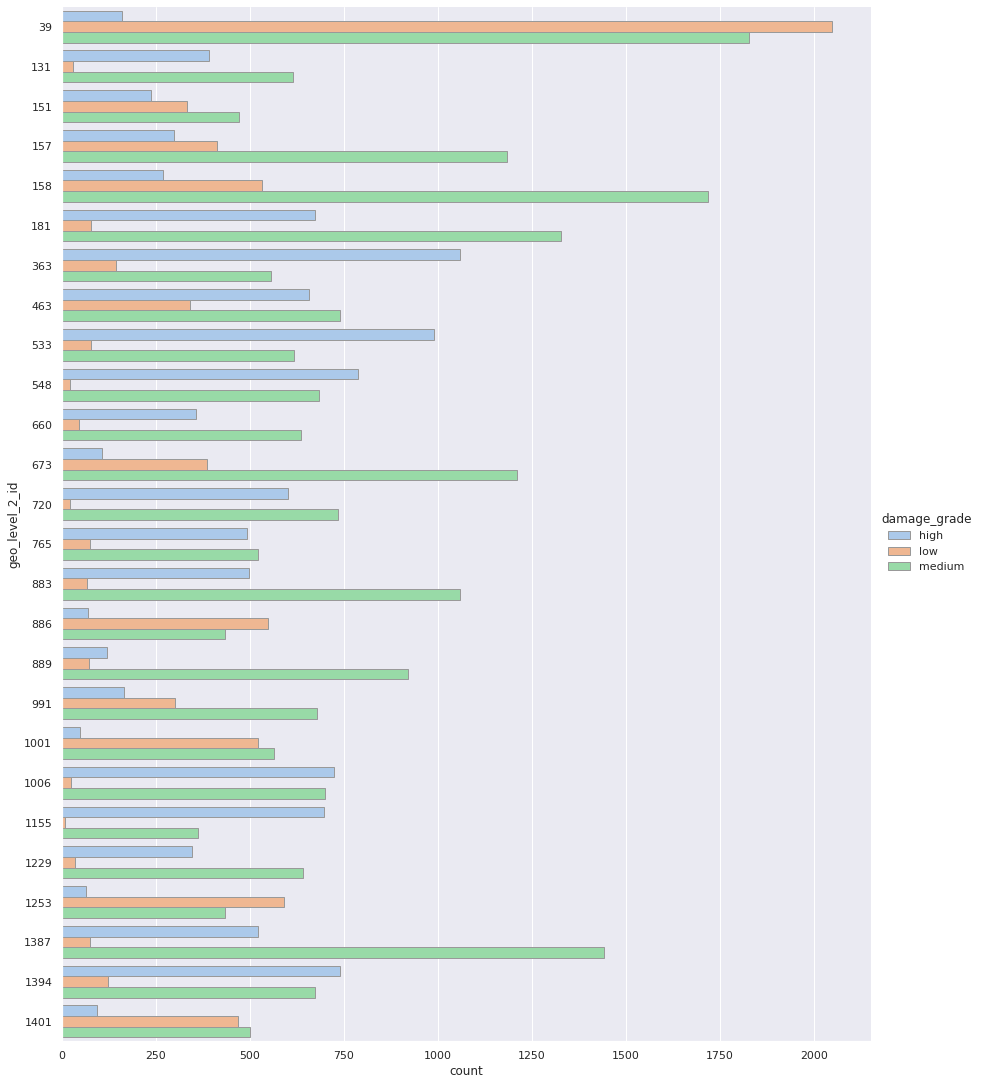

In [69]:
geo_2 = df[['building_id','geo_level_2_id', 'damage_grade']]
geo_2 = geo_2.groupby('geo_level_2_id').filter(lambda x: len(x) > 1000)
sns.catplot(y="geo_level_2_id", hue="damage_grade", kind="count",
            palette="pastel", edgecolor=".6",
            data=geo_2, height=15, aspect=6.7/8.27)

In [34]:
len(df.geo_level_3_id.unique())


11595

In [39]:
df.geo_level_3_id.value_counts().head(30)


633      651
9133     647
621      530
11246    470
2005     466
11440    455
7723     443
9229     381
2452     349
12258    312
8236     303
10445    302
2170     283
6626     283
2537     259
85       252
406      251
6973     248
7868     247
3904     241
10221    237
10795    236
1851     236
11319    230
10728    228
11015    225
9897     223
5839     218
9272     212
1320     212
Name: geo_level_3_id, dtype: int64

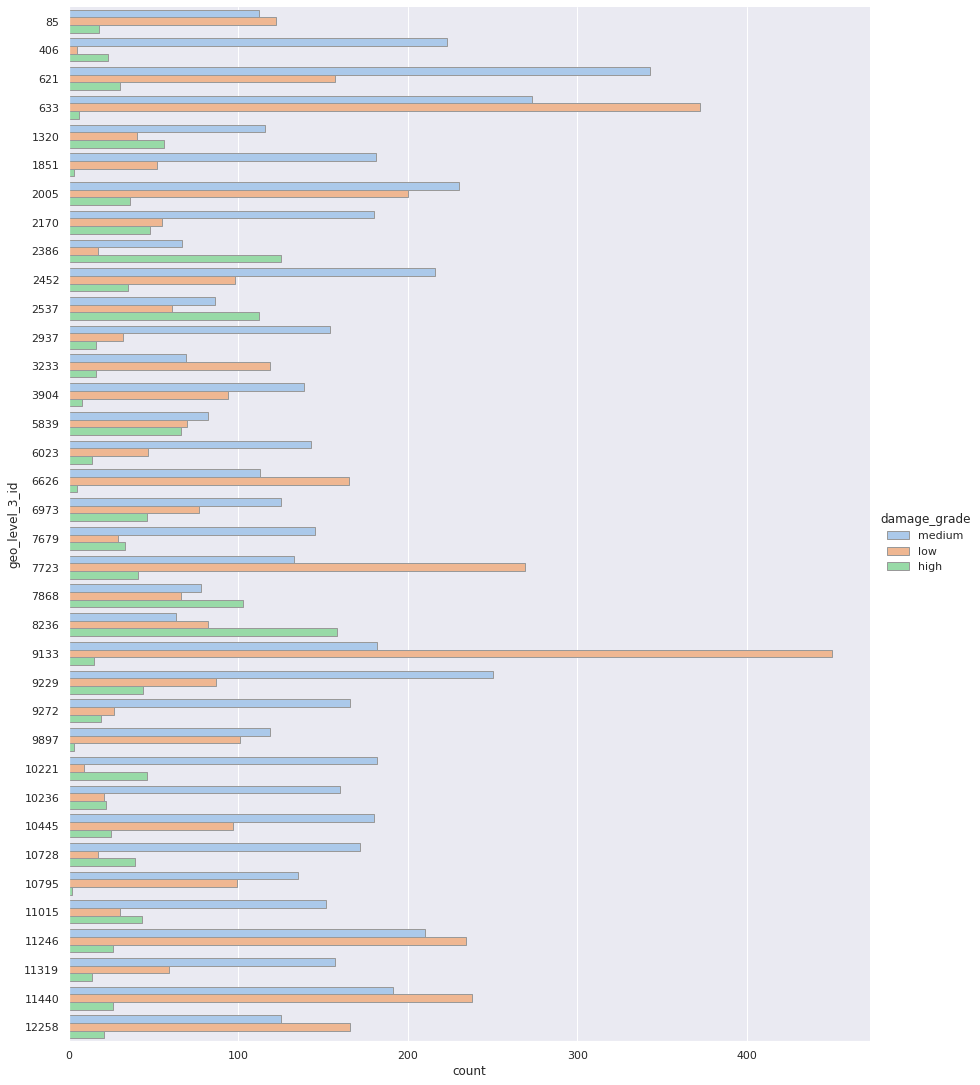

In [72]:
geo_3 = df[['building_id','geo_level_3_id', 'damage_grade']]
geo_3 = geo_3.groupby('geo_level_3_id').filter(lambda x: len(x) > 200)
sns.catplot(y="geo_level_3_id", hue="damage_grade", kind="count",
            palette="pastel", edgecolor=".6",
            data=geo_3, height=15, aspect=6.7/8.27)